In [1]:
import pandas as pd
import re

# Load the CSV file
df = pd.read_csv("QAmerged.csv")
import pandas as pd
#pd.set_option('display.max_colwidth', None)

df['label'] = df['label'].fillna(0)

# Convert the 'label' column to integers (0 and 1)
df['label'] = df['label'].astype(int)

# Display the updated DataFrame
print(df)

df.to_csv("QAmerged1.csv")

print(df.head(20))

                                                 answer  label
0     Marginal probability is theprobabilityof a sin...      0
1     The fundamental rules that control the behavio...      0
2     Conditional probability refers to the probabil...      1
3     The Bayes theorem predicts the probability tha...      1
4     A statistical concept known as variance quanti...      1
...                                                 ...    ...
2670  In SQL Server thedata dictionaryis a set of da...      0
2671  DISTINCT is useful in certain circumstances, b...      0
2672  These functions work with any data type and pe...      0
2673  COALESCE():COALESCE function in SQL returns th...      0
2674  In SQL for appending two strings, the ” Concen...      0

[2675 rows x 2 columns]
                                               answer  label
0   Marginal probability is theprobabilityof a sin...      0
1   The fundamental rules that control the behavio...      0
2   Conditional probability refers t

In [3]:
import pandas as pd
import re

# Remove leading and trailing whitespace
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Normalize internal whitespace
df['answer'] = df['answer'].apply(lambda x: re.sub(r'\s+', ' ', x) if isinstance(x, str) else x)

# Escape special characters
df['answer'] = df['answer'].apply(lambda x: x.replace('\n', ' ').replace('\r', ' ').replace('\\', ' ') if isinstance(x, str) else x)

# Save the cleaned data
#df.to_csv("cleaned_file.csv", index=False)


/var/folders/t8/5qy83krd04n96dc5kqzjmrch0000gn/T/ipykernel_91862/3232651935.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [4]:
import pandas as pd

# Define a list of error messages or keywords to filter out
error_messages = [
    "too many requests in 1 hour",
    "try again later",
    "there was an error generating a response"
]

# Filter out rows that contain any of these messages in the 'text' column
# We use a regular expression (regex) to match any of the error patterns
pattern = '|'.join(error_messages)
df = df[~df['answer'].str.contains(pattern, case=False, na=False)]

In [5]:
df.head(20)

,answer,label
0,Marginal probability is theprobabilityof a sin...,0
1,The fundamental rules that control the behavio...,0
2,Conditional probability refers to the probabil...,1
3,The Bayes theorem predicts the probability tha...,1
4,A statistical concept known as variance quanti...,1
5,"Mean:The mean, often referred to as the averag...",1
6,"The normal distribution, also known as the Gau...",1
7,SQLstands for Structured Query Language.It is ...,0
8,BothSQL(Structured Query Language) andNoSQL(No...,0
9,"Relational database systems, both open source ...",1


In [12]:
df['answer'] = df['answer'].fillna("").astype(str)
df = df[df['answer'].str.strip() != ""]

# Compute the lengths of each answer
df['answer_length'] = df['answer'].apply(len)

# Find the minimum and maximum length
min_length = df['answer_length'].min()
max_length = df['answer_length'].max()

print(f"Minimum answer length: {min_length}")
print(f"Maximum answer length: {max_length}")

Minimum answer length: 19
Maximum answer length: 5400


<Axes: ylabel='Frequency'>

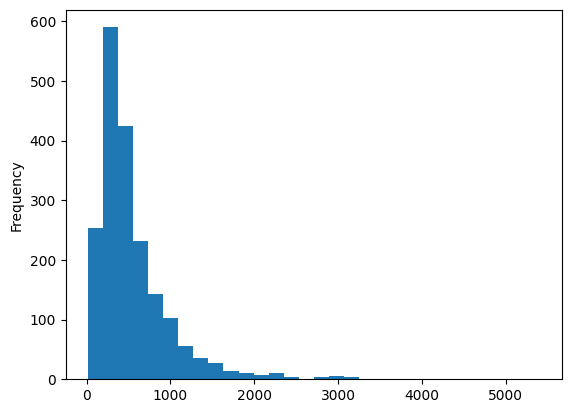

In [13]:
df['text_length'].plot(kind='hist', bins=30)

In [14]:
average_length = df['answer_length'].mean()
print(f"Average answer length: {average_length:.2f}")

Average answer length: 556.32


In [15]:
mode_value = df['text_length'].mode()
print(mode_value)

0    402
Name: text_length, dtype: int64


Most samples have shorter lengths.

 There’s a small number of samples with a very high length, as shown by the long tail extending far to the right. 